<a href="https://colab.research.google.com/github/jardimguilherme/MO911A/blob/master/assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yugioh Dataset

Yugioh is a popular trading card game (TCG) played since the late 90's.

The chosen trading card game consists on 3 major types of cards: creatures, spells, and traps.
Each of those cards possess attributes of their own.

This assignment will focus on exploring data on yugioh creatures. Creature cards on yugioh have characteristics such as level, attack, defense, attribute, and so on and so forth.

For this assignment, I chose to explore the dataset containing data extracted from the cards within the game

The agenda of this assignment consists of:
1.   Configuring the working environment
2.   Importing the dataset
3.   Cleaning and formatting the data
4.   Plotting the graphs



# Configuring the working environment 

Libraries and directories setup

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the dataset

dataset download

In [ ]:
! kaggle datasets download archanghosh/yugioh-database

dataset unzip

In [ ]:
! unzip yugioh-database.zip

# Cleaning and formatting the data

cleaning column names

In [48]:
data = pd.read_csv("Yugi_db_cleaned.csv")
data.columns = data.columns.str.replace(' ', '')
data.columns = data.columns.str.replace('/', '')
data.columns = data.columns.str.replace('_', '')
data.columns = data.columns.str.replace('-', '')
data.columns = data.columns.str.replace('(', '')
data.columns = data.columns.str.replace(')', '')

data.columns

<ipython-input-48-d14dfd2d4f1f>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.columns = data.columns.str.replace('(', '')
<ipython-input-48-d14dfd2d4f1f>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.columns = data.columns.str.replace(')', '')


Index(['Imagename', 'Cardset', 'Cardnumber', 'Rarity', 'Cardname',
       'Othernames', 'Cardtype', 'Attribute', 'Types', 'Level', 'ATKDEF',
       'Password', 'Status', 'Effecttypes', 'Ritualrequired', 'Property',
       'RitualMonsterrequired', 'PendulumScale', 'Rank', 'LinkArrows',
       'ATKLINK', 'OthernamesJapanese', 'Summonedbytheeffectof'],
      dtype='object')

spliting ATK/DEF column into two different columns (one for attack and one for defense)

In [116]:
data[['ATK','DEF']] = data.ATKDEF.str.split(" / ", expand=True)

Cleaning unwanted columns and creating dataframe for graphs plotting

In [240]:
dataframe = pd.DataFrame(data)
dataframe = dataframe.drop(columns=['Cardnumber', 'Password', 'Status', 'PendulumScale', 'Rank', 'Effecttypes','Imagename', 'Cardset', 'Rarity', 'Othernames', 'ATKDEF', 'RitualMonsterrequired', 'LinkArrows', 'ATKLINK', 'Summonedbytheeffectof', 'OthernamesJapanese', 'Property', 'Ritualrequired'])

In [241]:
dataframe.columns

Index(['Cardname', 'Cardtype', 'Attribute', 'Types', 'Level', 'ATK', 'DEF'], dtype='object')

# Plotting the Graphs

## Histogram

This histogram shows the number of creatures per level

Text(0.5, 0, 'Level')

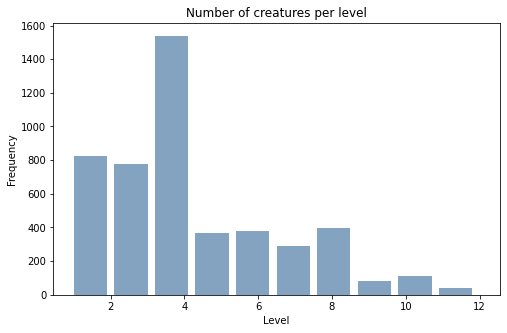

In [284]:
df = dataframe.query("Cardtype == 'Monster'")

df['Level'].plot(kind='hist', figsize=(8,5), title='Number of creatures per level', color=(0.2, 0.4, 0.6, 0.6), width=0.9)
plt.xlabel('Level')

## Pie Chart

The following pie chart displays the percentage of creatures per attribute

<function matplotlib.pyplot.show(*args, **kw)>

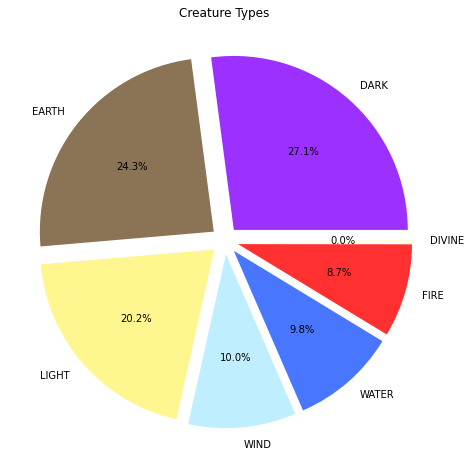

In [274]:
entries = dataframe['Attribute'].value_counts()

colors = ['#9B30FF', '#8B7355', '#FFF68F', '#BFEFFF', '#4876FF', '#FF3030', '#FFFF00']

entries.plot(kind='pie', autopct='%1.1f%%', explode=[0.08,0.08,0.08,0.08,0.08,0.08,0.08], colors=colors, title='Creature Types', figsize=(8,8))
plt.axis('off')
plt.show

##Scatter Plot

For the scatter plot, we want to check the distribution of the attack (atk) attribute per level.
Since some creatures do not have level nor attack, we will drop those entries

In [ ]:
df = dataframe.query("Cardtype == 'Monster'")
df = df.dropna()
df = df[df.ATK != '?']

After the last data cleaning, for this analysis, we achieve the following scatter plot

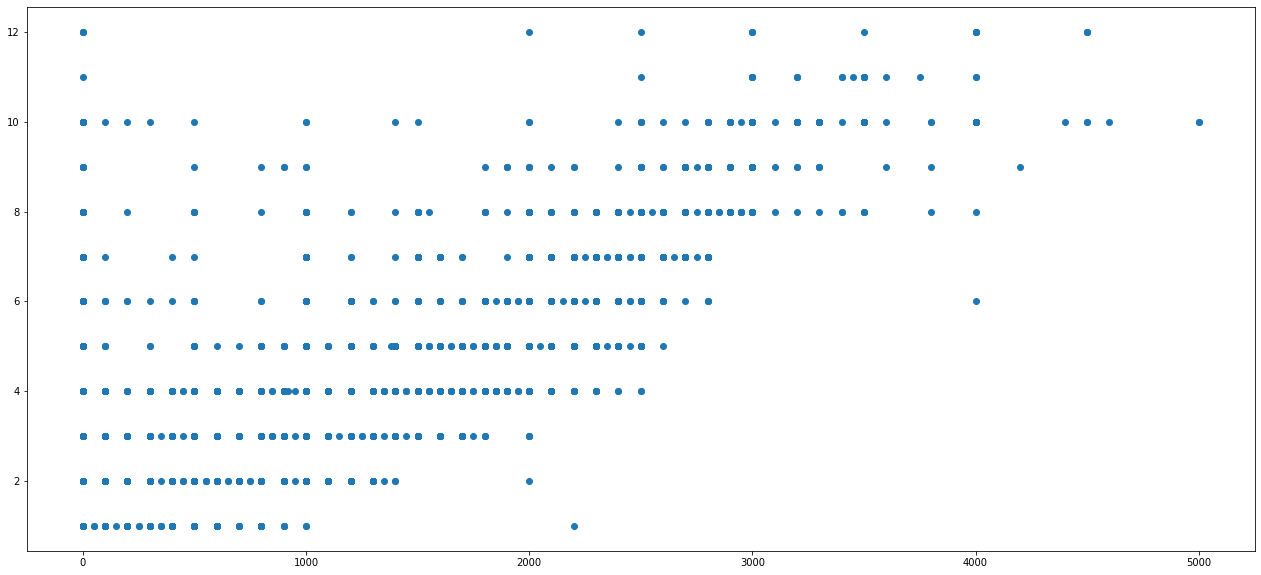

In [322]:
rng = np.random.RandomState(10)

y = df['Level'].astype('int')
x = df['ATK'].astype('int')

plt.figure(figsize=(22,10))
plt.scatter(x, y)